In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
laptop = pd.read_csv("final_dataset.csv")

# Exploratory Data Analysis

In [8]:
laptop.shape

(1565, 16)

In [9]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1565 non-null   object 
 1   price             1565 non-null   int64  
 2   brand             1565 non-null   object 
 3   model             1565 non-null   object 
 4   processor         1565 non-null   float64
 5   ram memory        1565 non-null   int64  
 6   display size      1565 non-null   float64
 7   storage capacity  1565 non-null   int64  
 8   cpu cores         1565 non-null   int64  
 9   graphics card     1565 non-null   int64  
 10  rating            1565 non-null   float64
 11  reviews           1565 non-null   int64  
 12  name              1565 non-null   object 
 13  url               1565 non-null   object 
 14  image             1376 non-null   object 
 15  instock           1565 non-null   object 
dtypes: float64(3), int64(6), object(7)
memory 

In [10]:
laptop.describe()

,price,processor,ram memory,display size,storage capacity,cpu cores,graphics card,rating,reviews
count,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000
mean,123489.798722,5.474760,10.526518,14.911693,539.971885,6.562939,1956.523962,0.289137,0.232588
std,73749.181730,1.557868,5.080311,0.895640,269.063373,2.956748,1003.492205,1.112477,2.194701
min,25500.000000,2.000000,4.000000,10.500000,64.000000,1.000000,0.000000,0.000000,0.000000
25%,73999.000000,5.000000,8.000000,14.000000,256.000000,4.000000,1000.000000,0.000000,0.000000
50%,104990.000000,5.000000,8.000000,15.600000,512.000000,6.000000,2000.000000,0.000000,0.000000
75%,150000.000000,7.000000,16.000000,15.600000,512.000000,8.000000,2800.000000,0.000000,0.000000
max,555555.000000,9.000000,32.000000,17.300000,2048.000000,24.000000,4070.000000,5.000000,73.000000


In [11]:
attributes = list(laptop.columns)
excluded_cols = ['brand', 'model', 'name', 'id', 'url', 'image', 'instock']
numeric_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'price', 'id', 'url', 'image', 'instock']
count_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'id', 'url', 'image', 'instock']
pair_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'brand', 'rating', 'reviews', 'id', 'url', 'image', 'instock']
brand_cols = [col for col in attributes if col not in excluded_cols]

## Basic Visualization

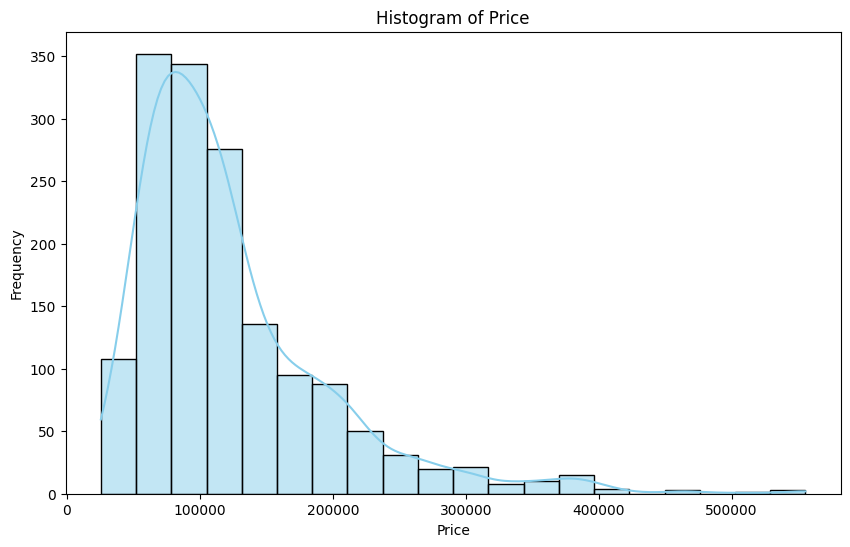

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


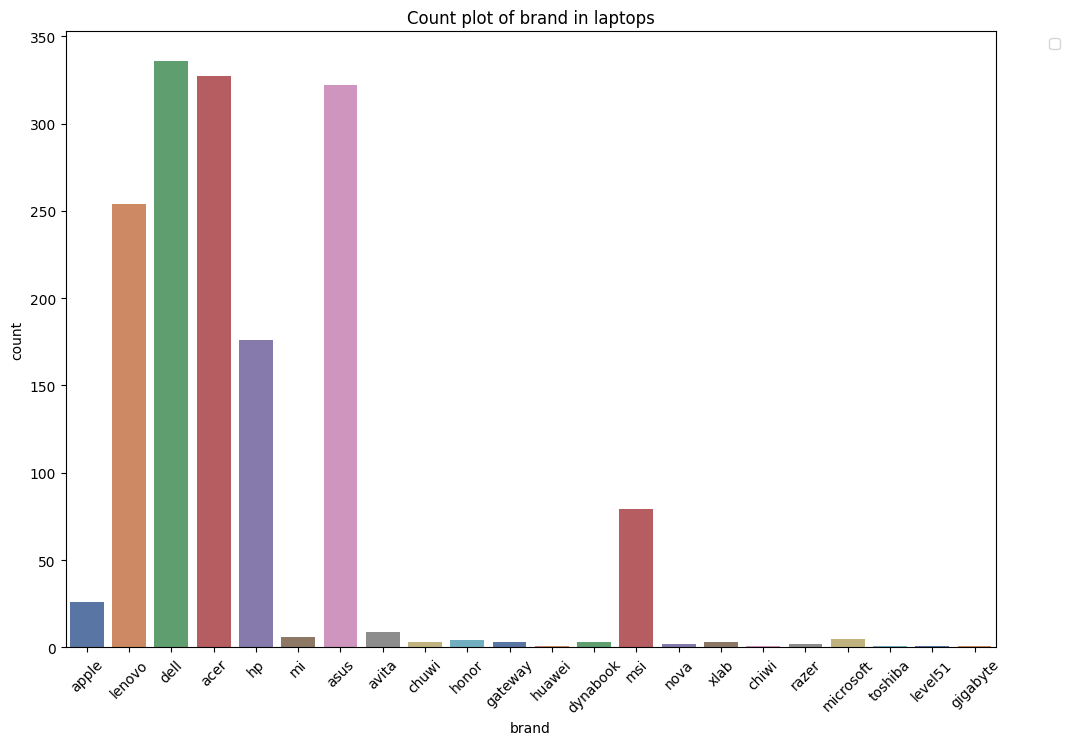

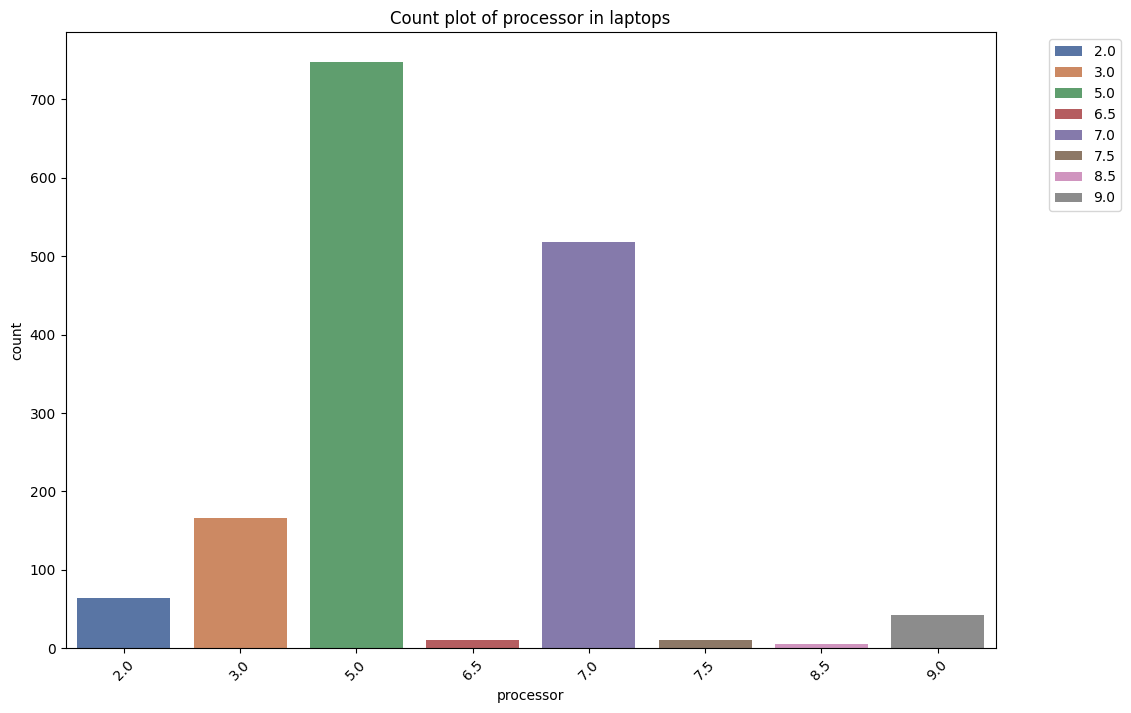

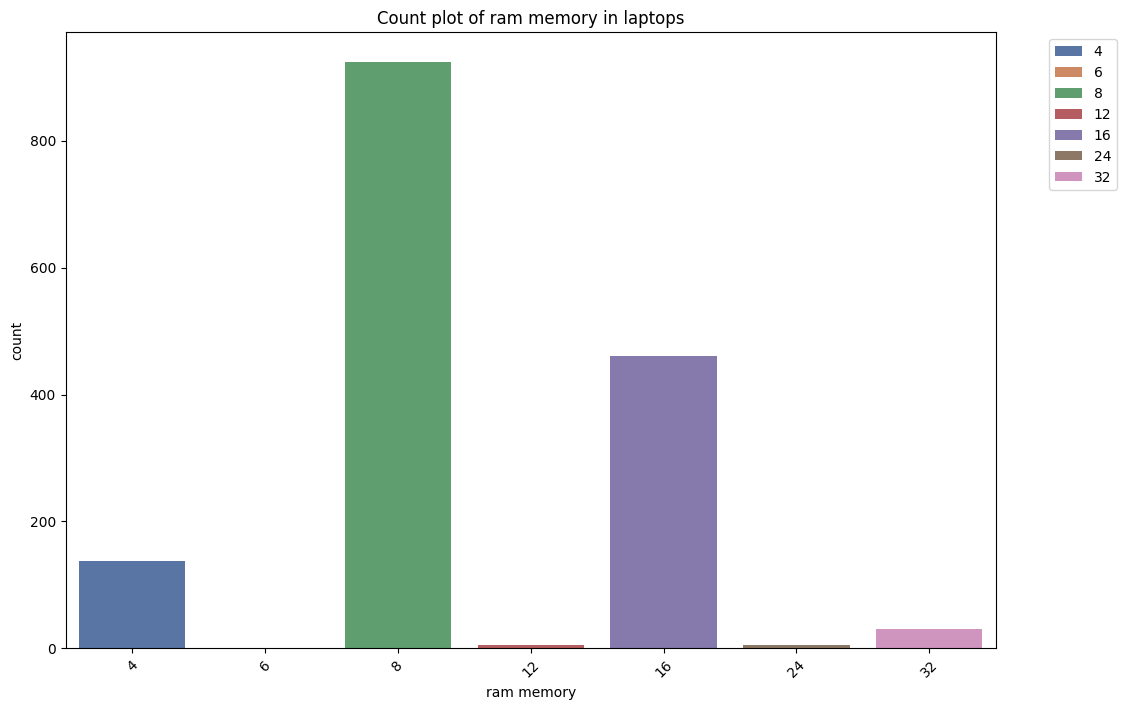

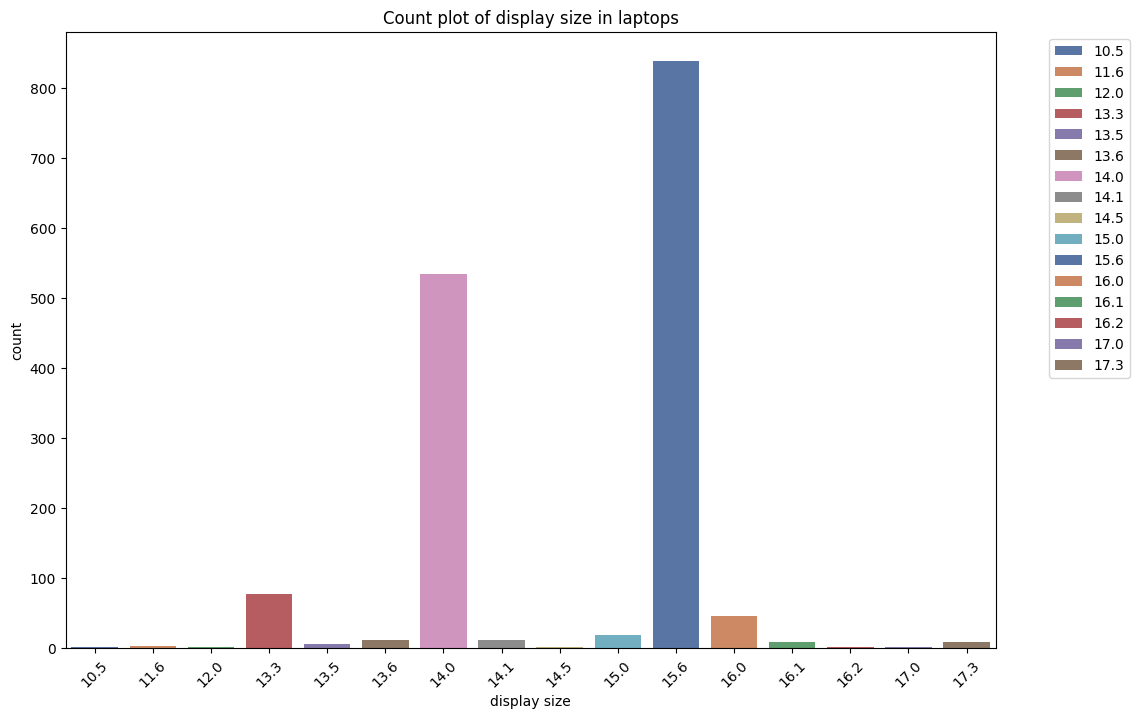

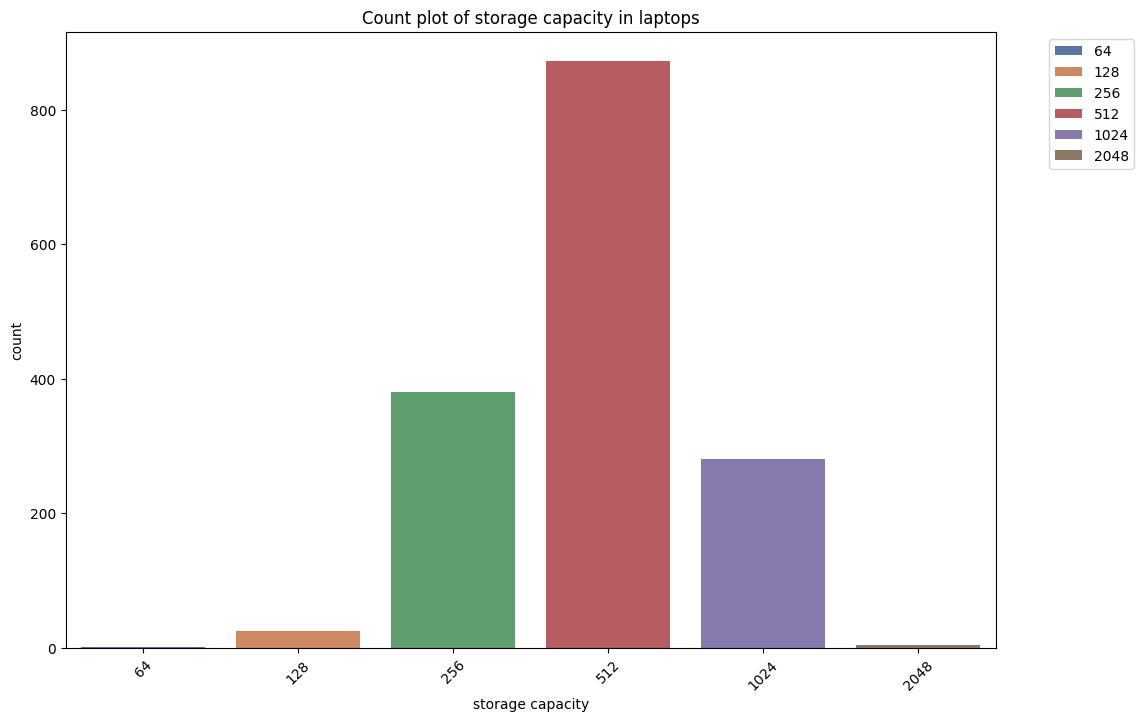

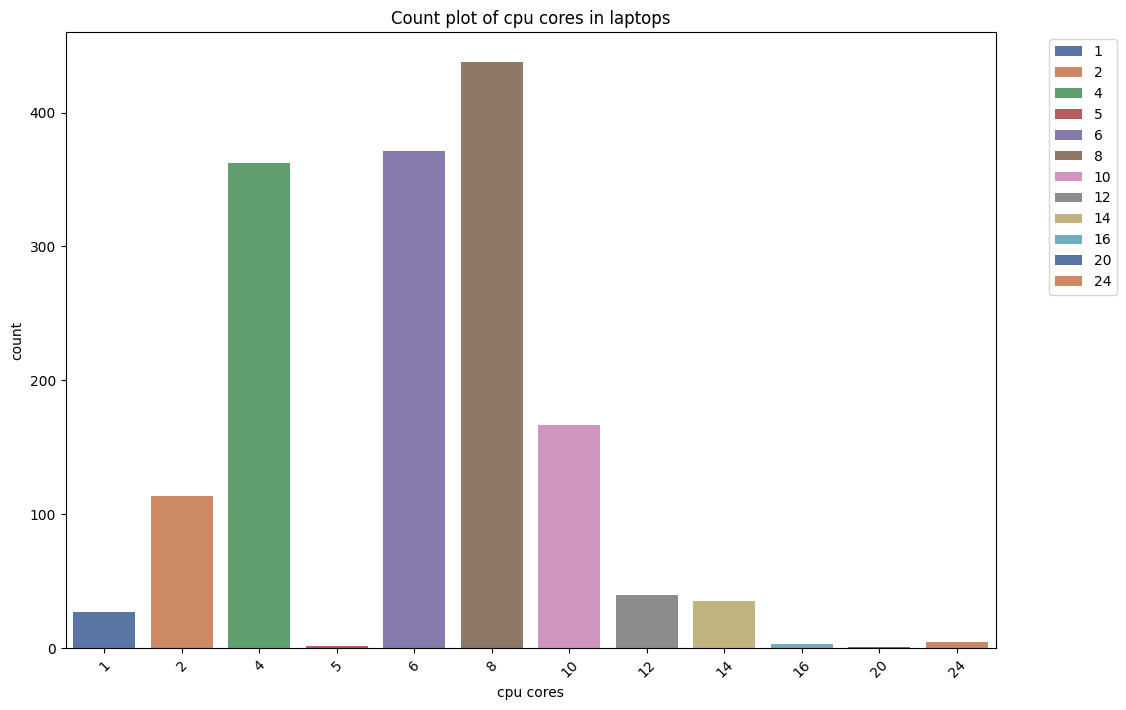

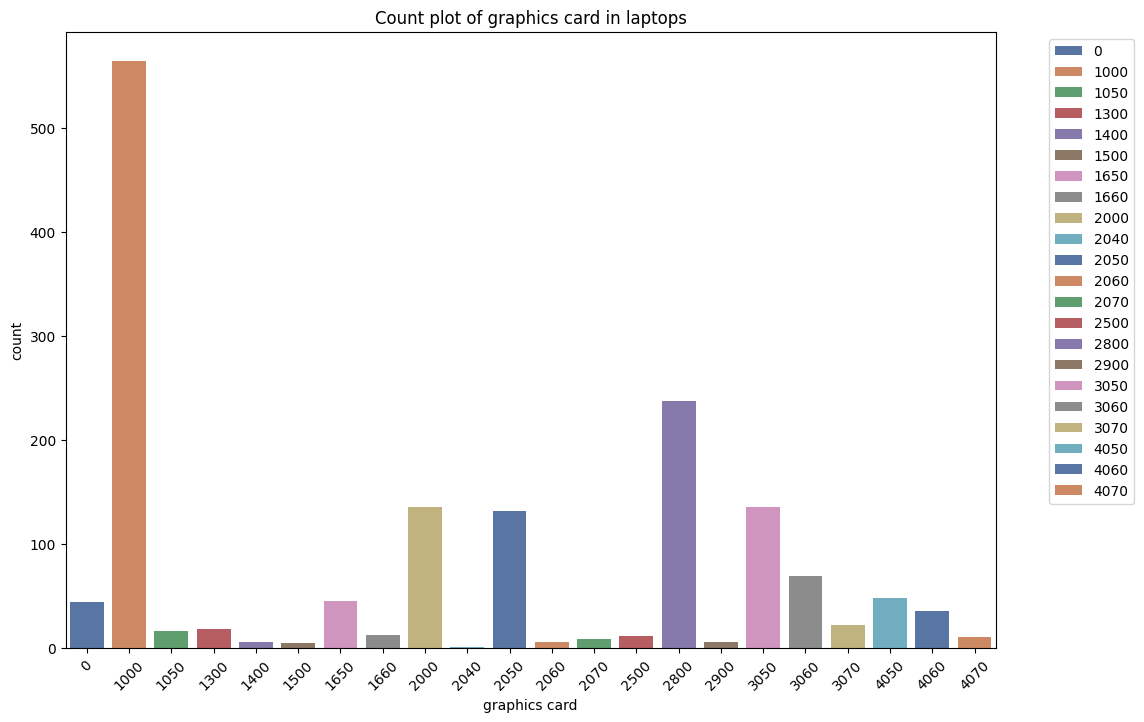

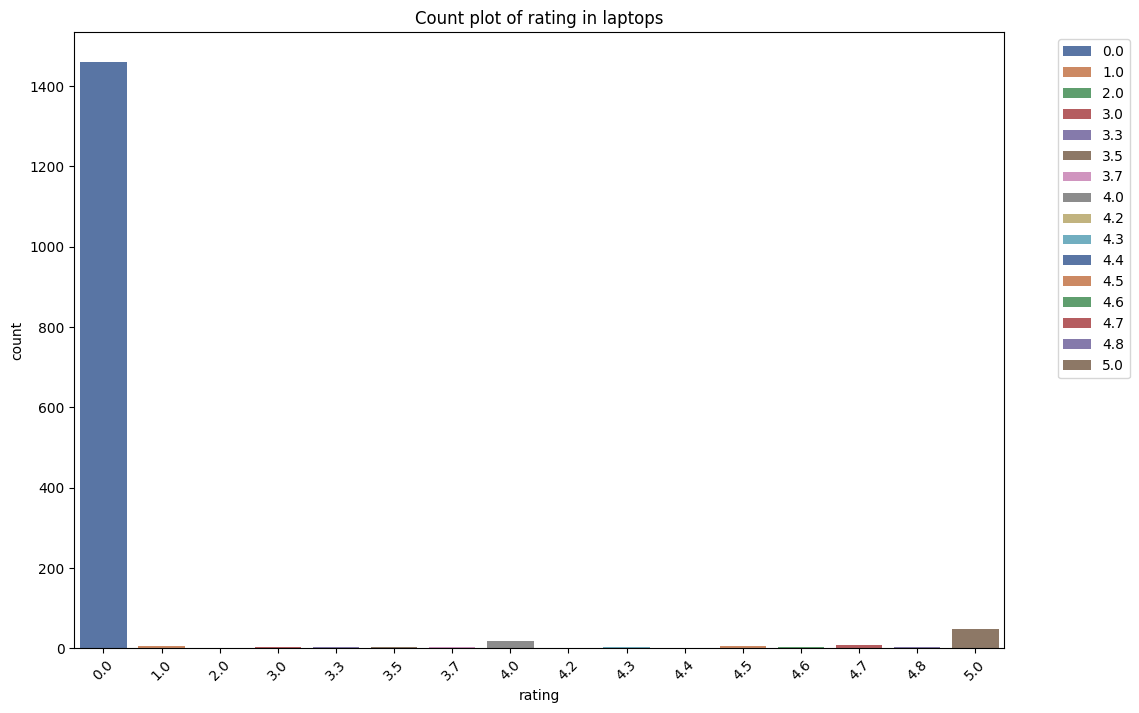

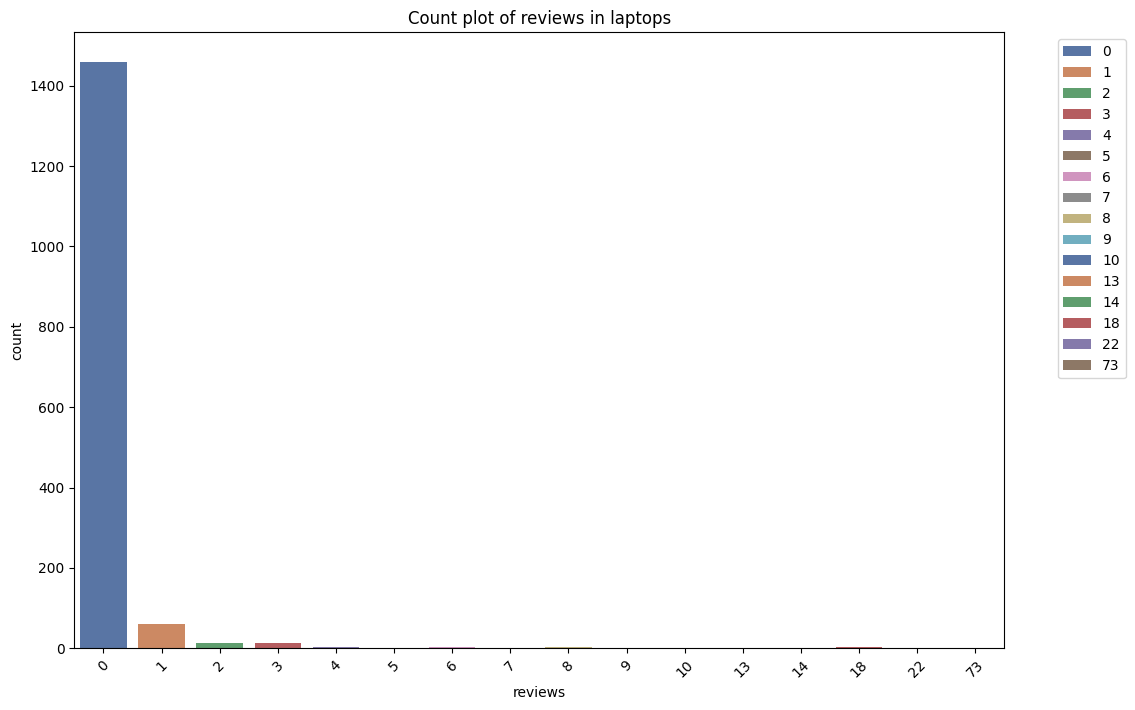

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=laptop, x='price', bins=20, color='skyblue', kde=True)
plt.title(f'Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

for col in count_cols:
    plt.figure(figsize=(12,8))
    sns.countplot(data=laptop, x=col, hue=col, palette='deep')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f"Count plot of {col} in laptops")
    plt.show()


## Brand-wise Analysis

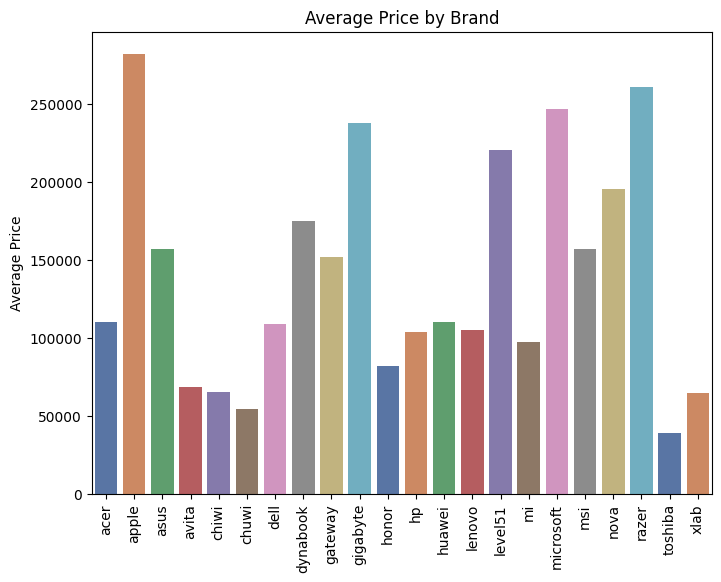

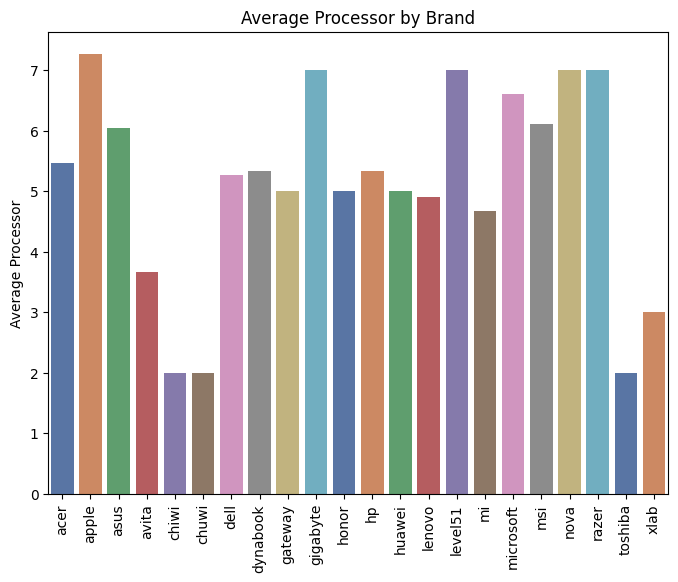

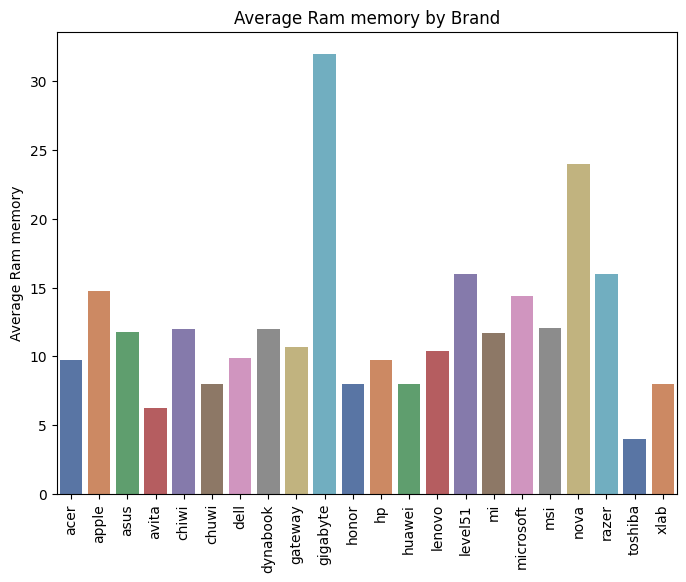

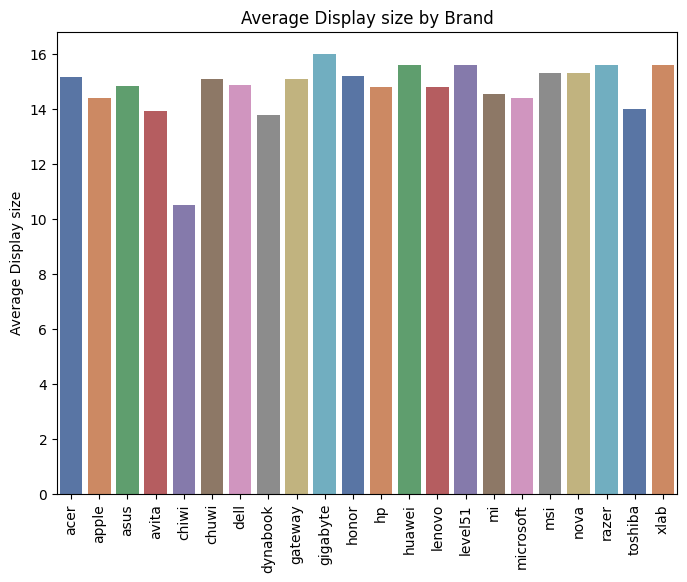

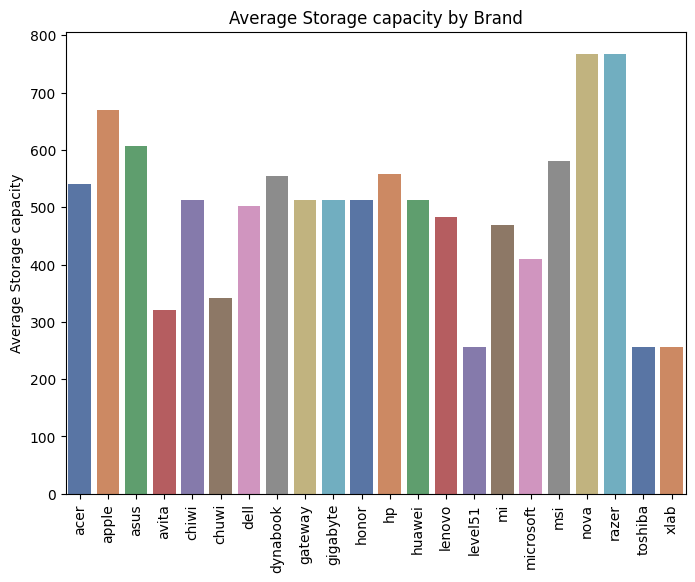

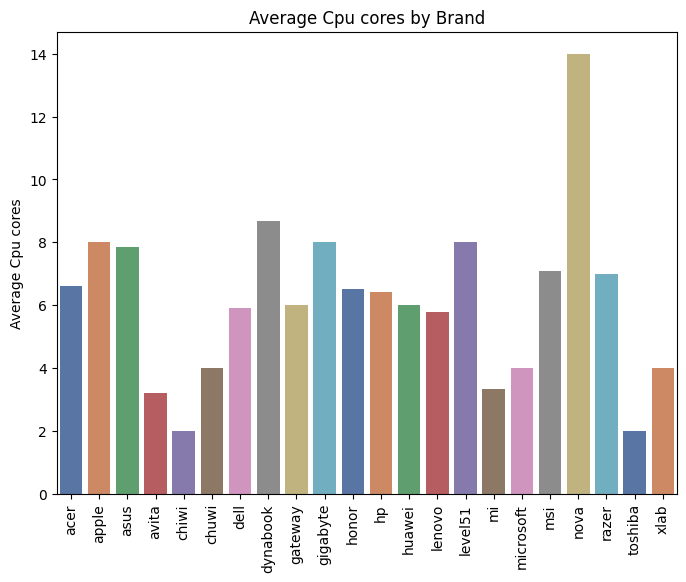

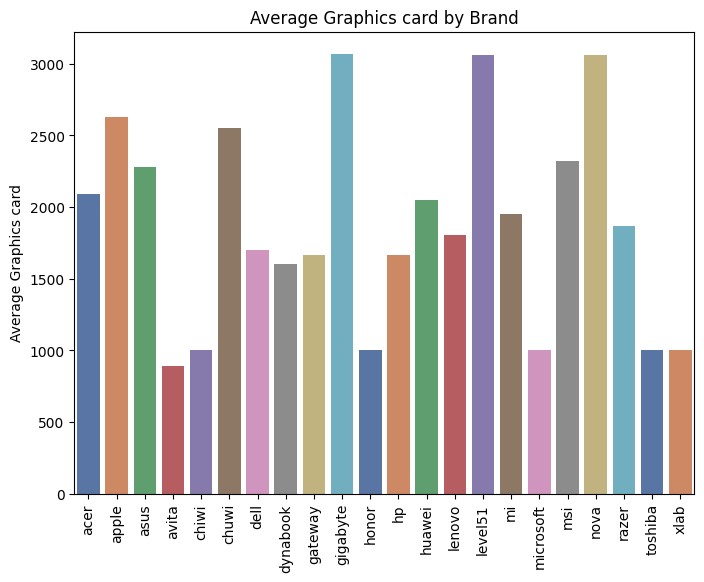

In [13]:
brand_analysis = laptop.groupby('brand').agg({
    'price': 'mean',
    'rating': 'mean',
    'processor': 'mean',
    'ram memory': 'mean',
    'display size': 'mean',
    'storage capacity': 'mean',
    'cpu cores': 'mean',
    'graphics card': 'mean'
}).reset_index()


for i, col in enumerate(brand_cols, 1):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=brand_analysis, x='brand', y=col, hue='brand', palette='deep')
    plt.xticks(rotation=90)
    plt.title(f'Average {col.capitalize()} by Brand')
    plt.xlabel('')
    plt.ylabel(f'Average {col.capitalize()}')
    plt.show()

## Bivariate Visualization

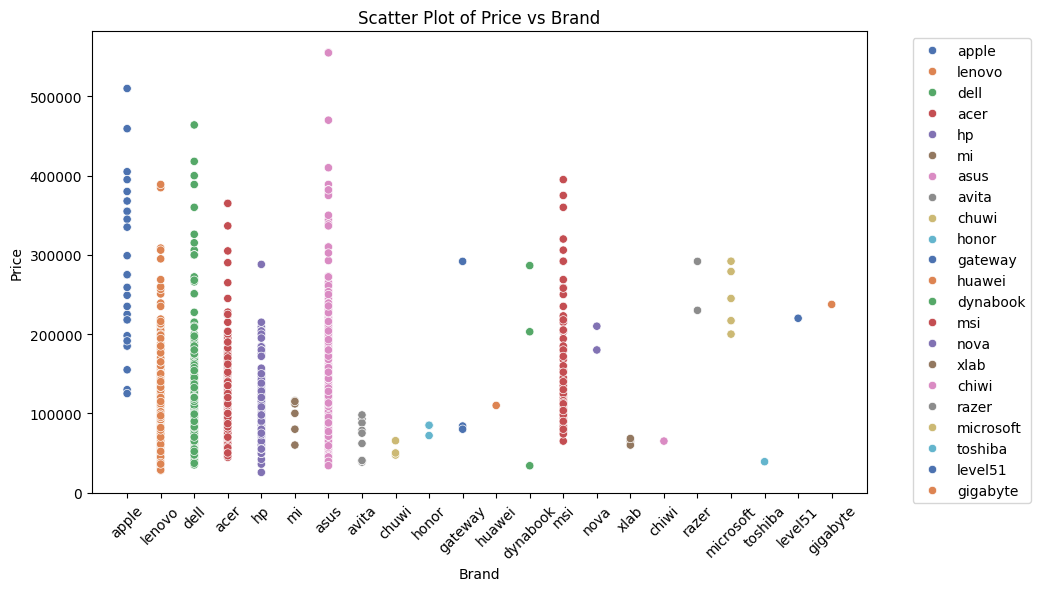

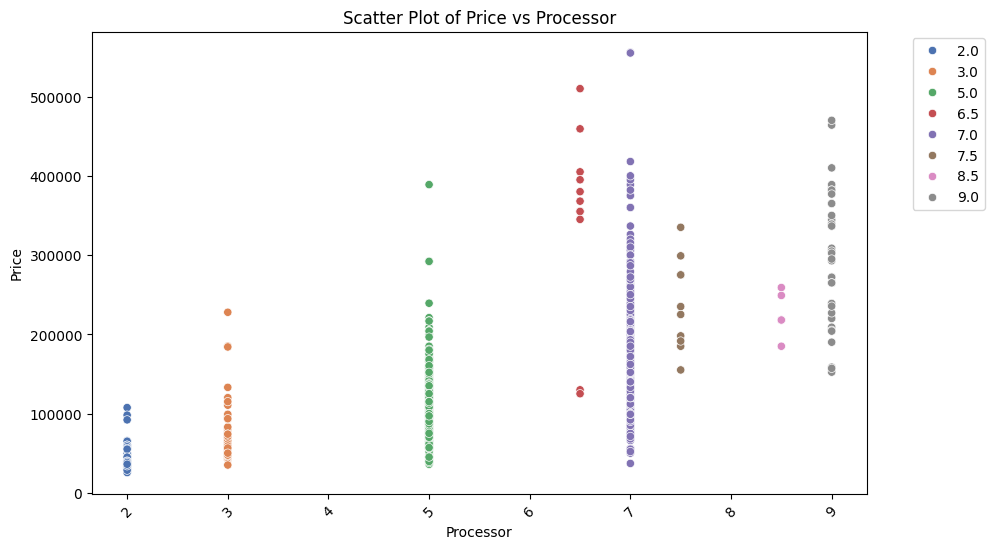

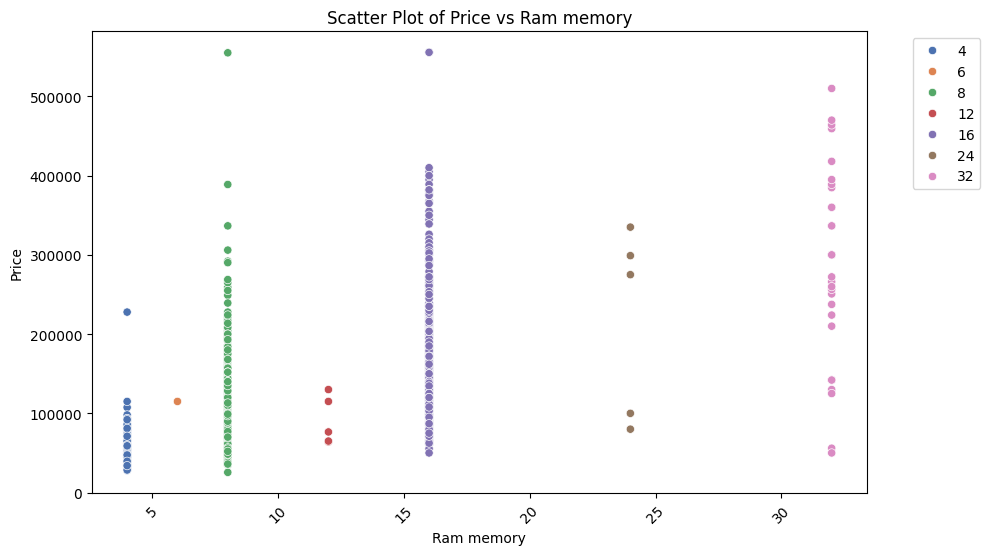

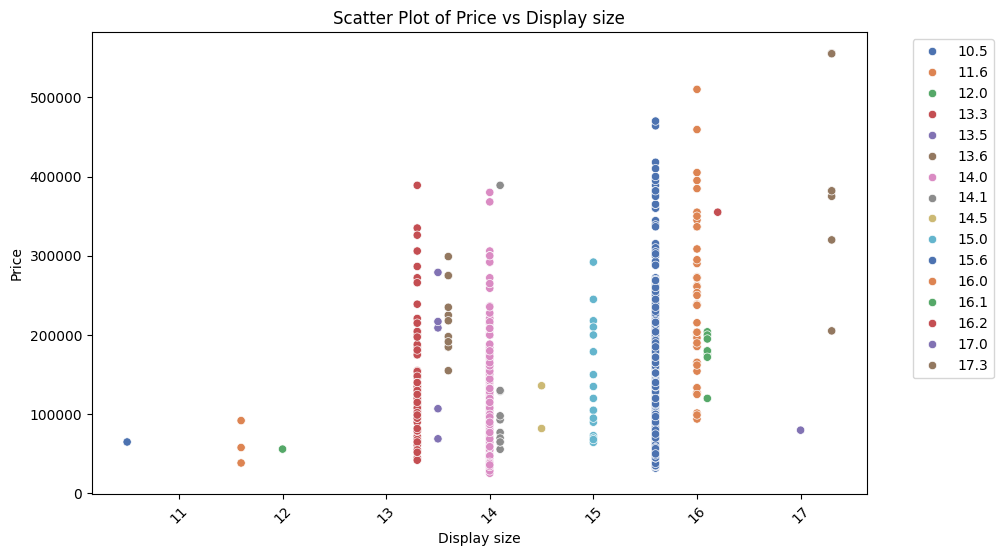

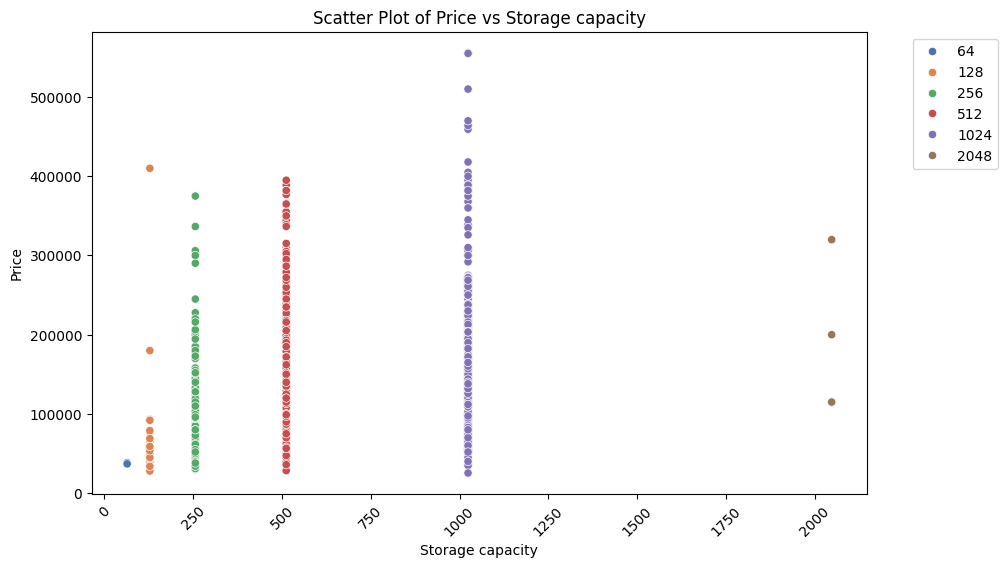

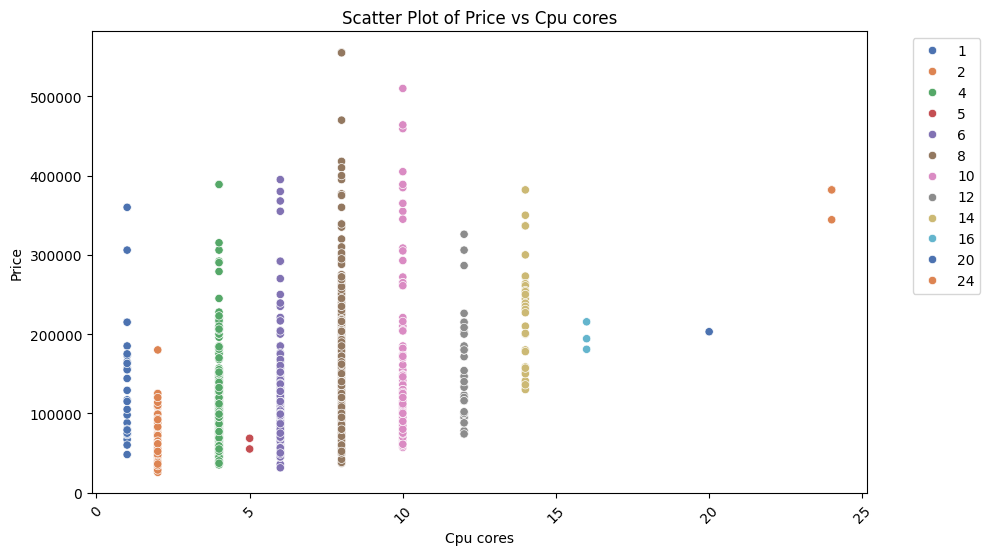

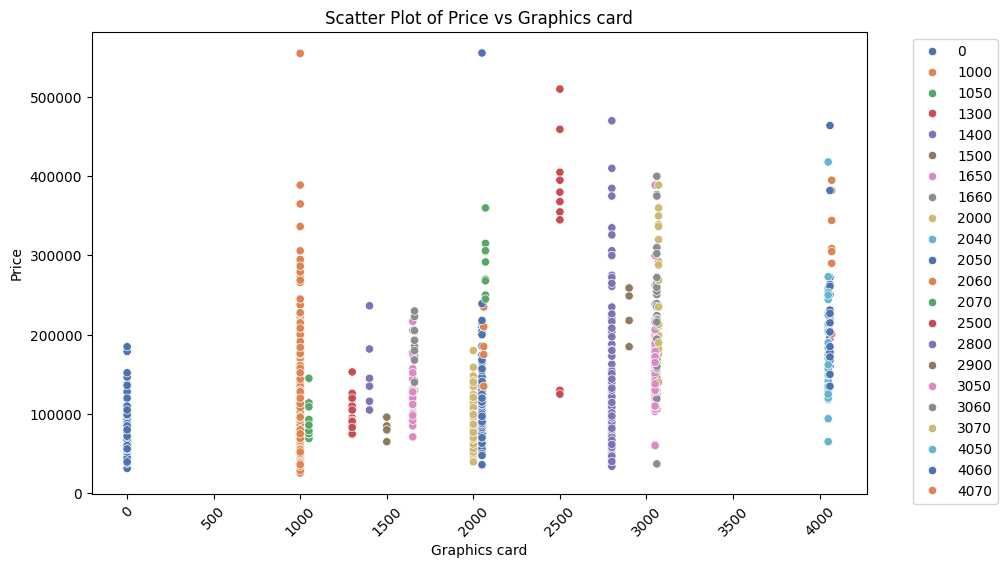

In [14]:
cols_to_plot = ['brand', 'processor', 'ram memory', 'display size', 'storage capacity', 'cpu cores', 'graphics card']

for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=laptop, x=col, y='price', hue=col, palette='deep')
    plt.title(f'Scatter Plot of Price vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

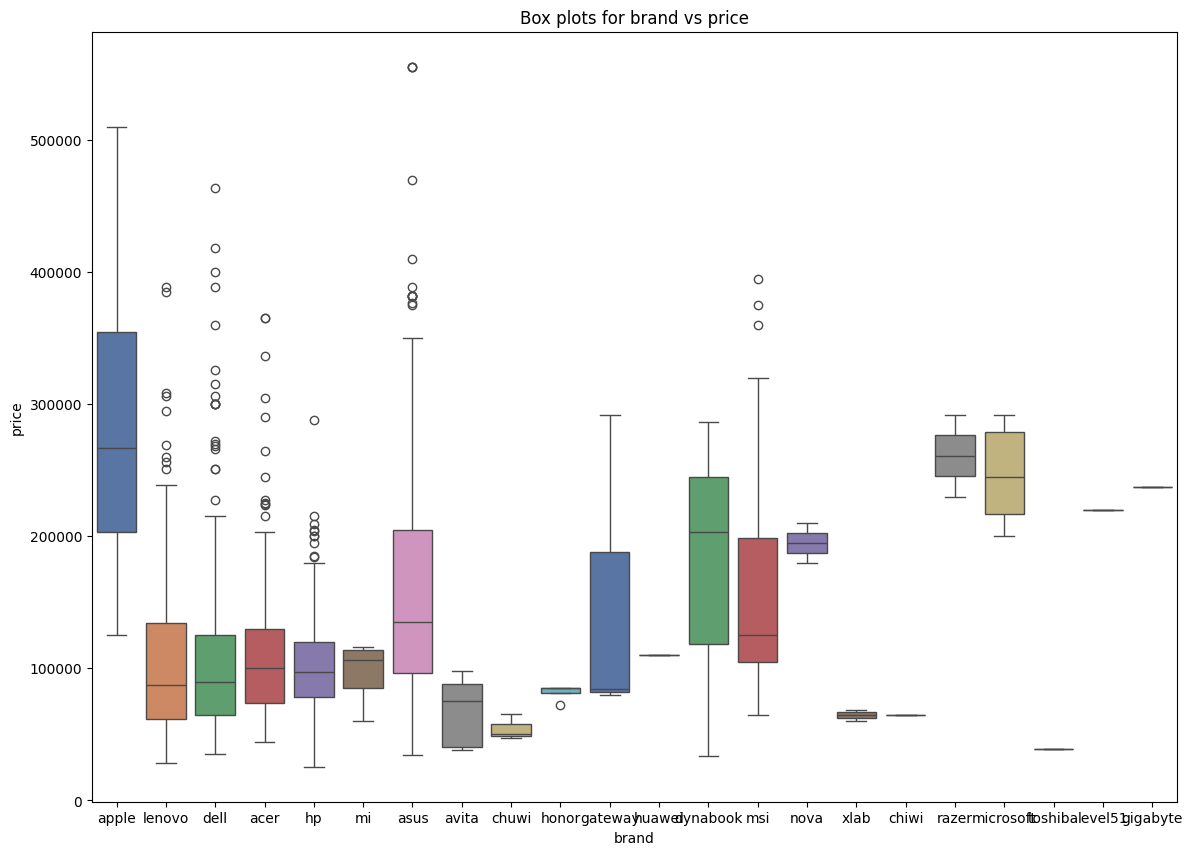

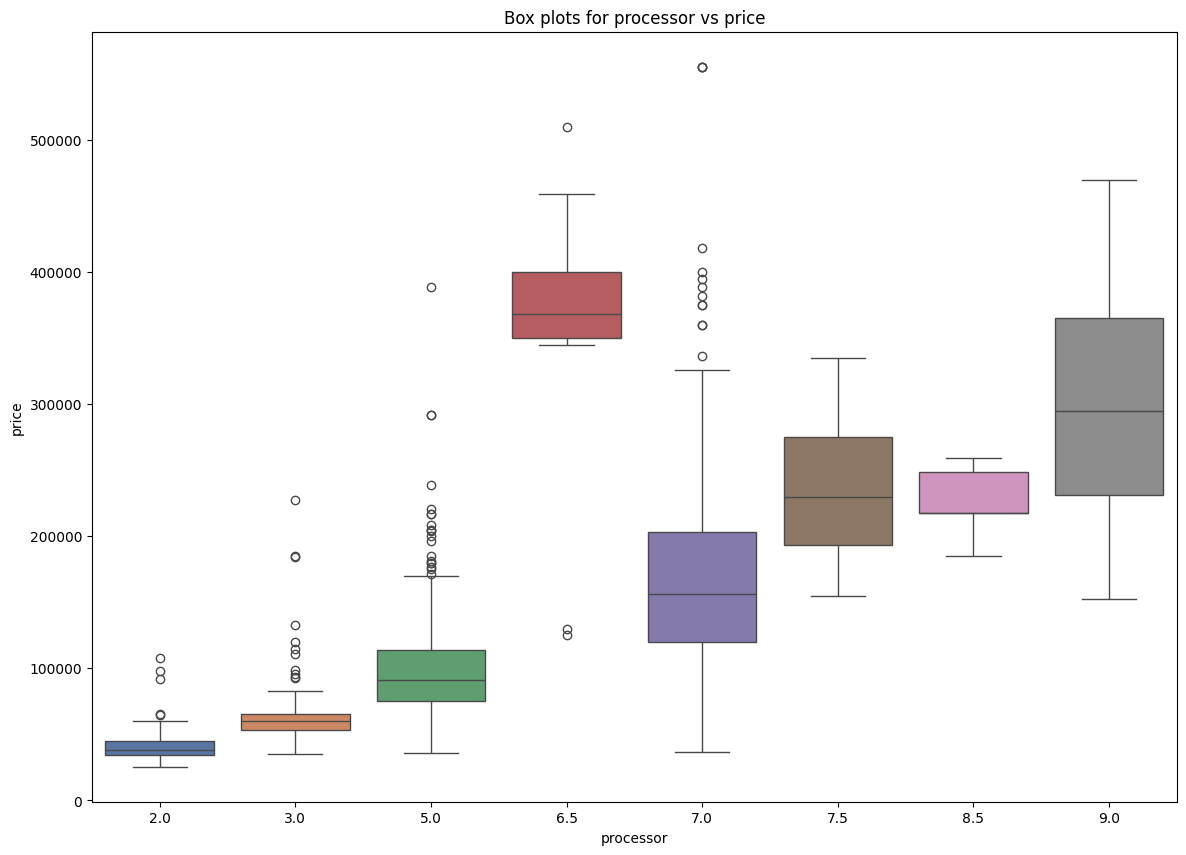

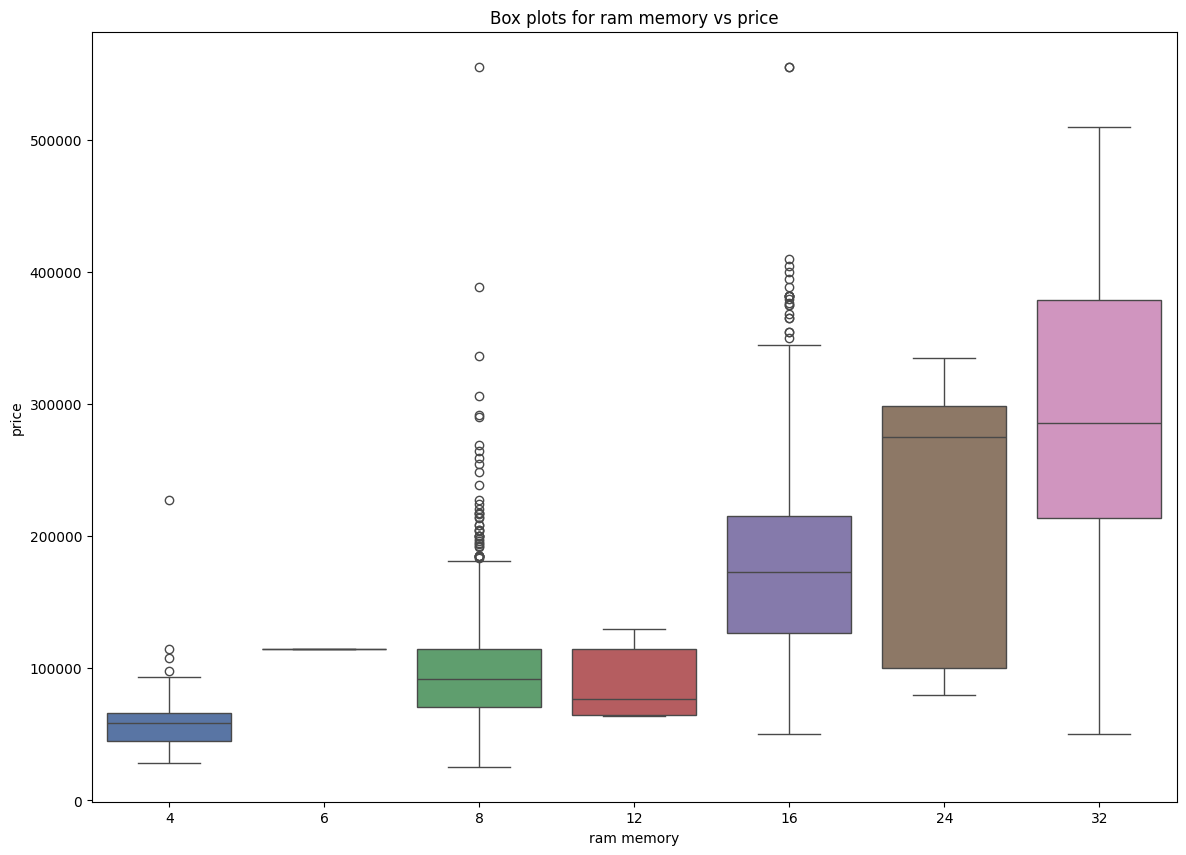

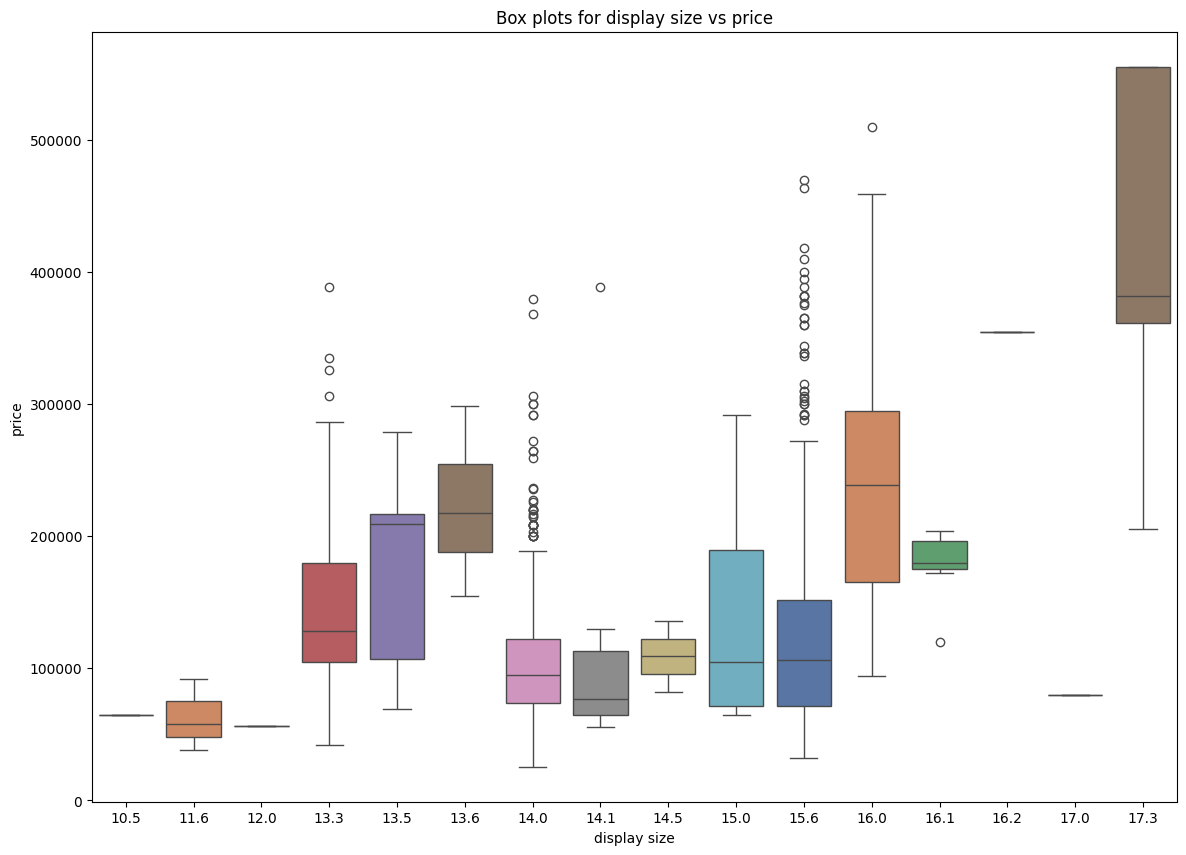

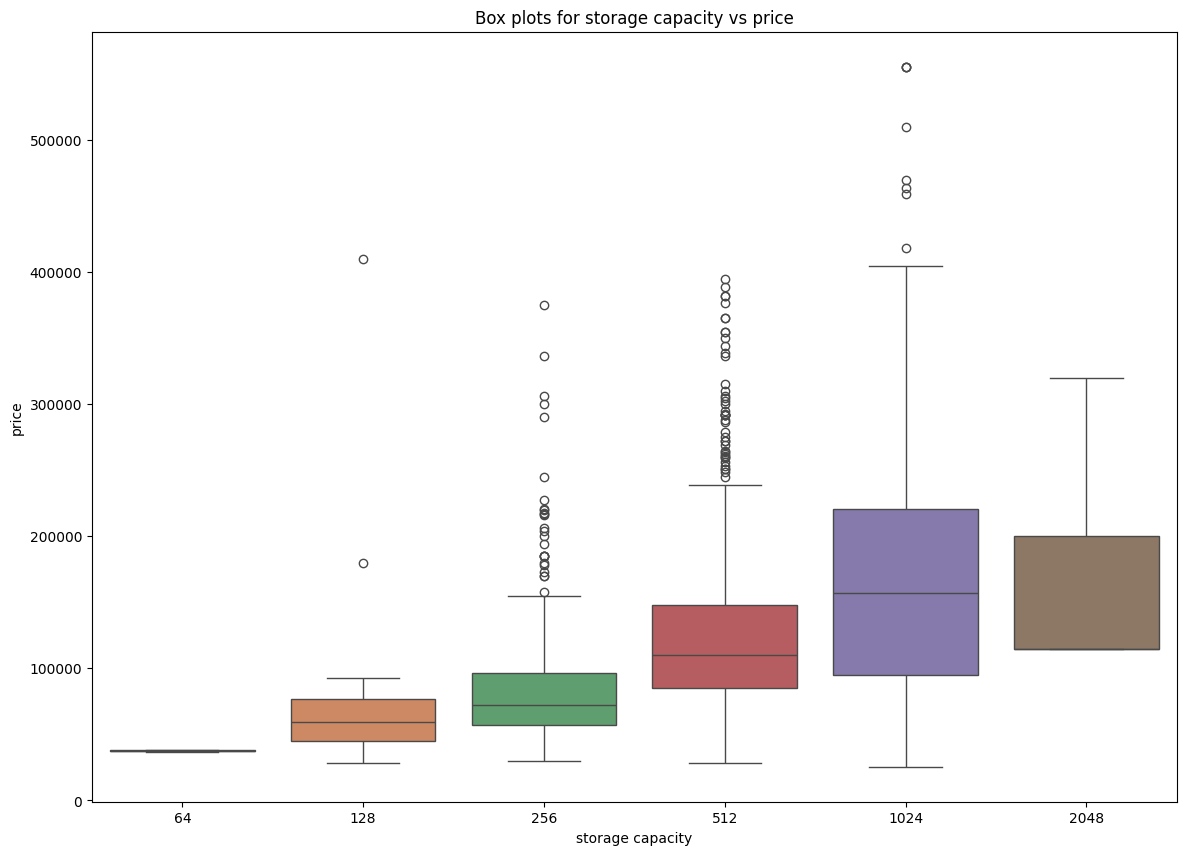

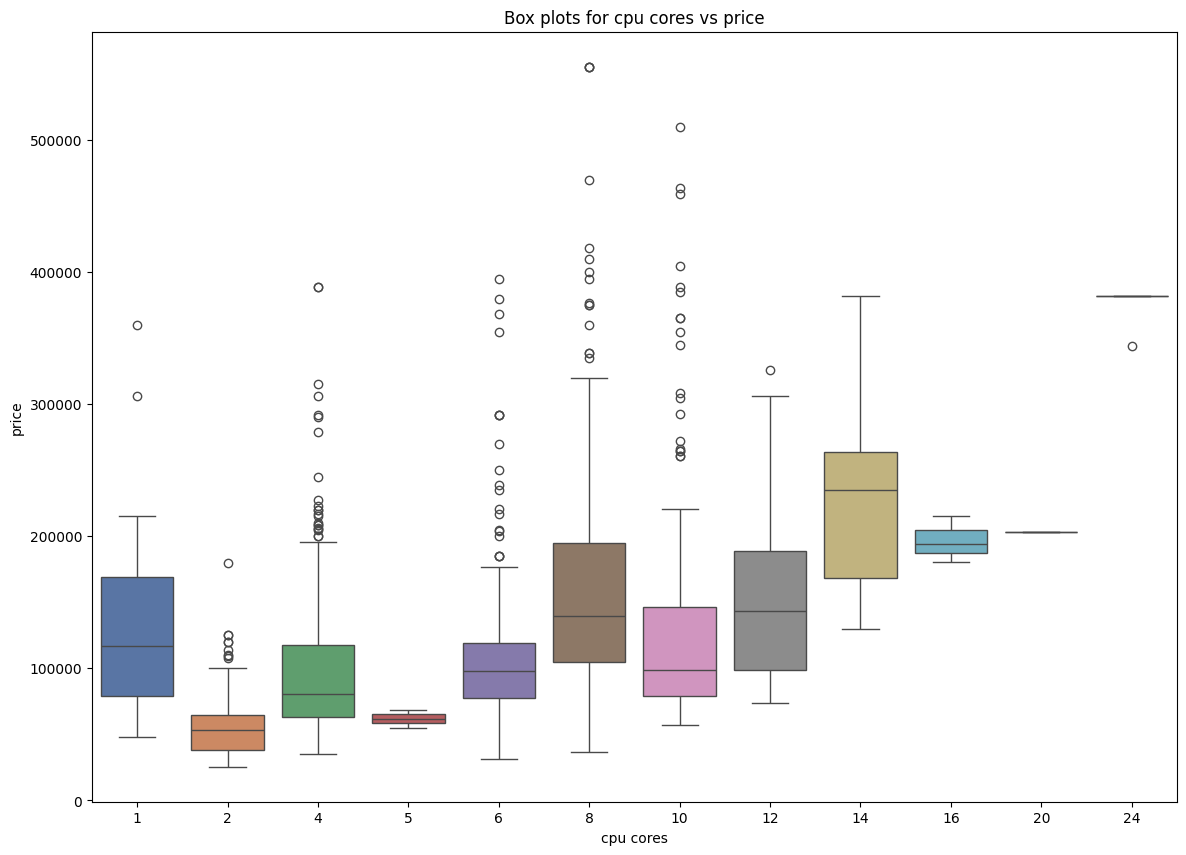

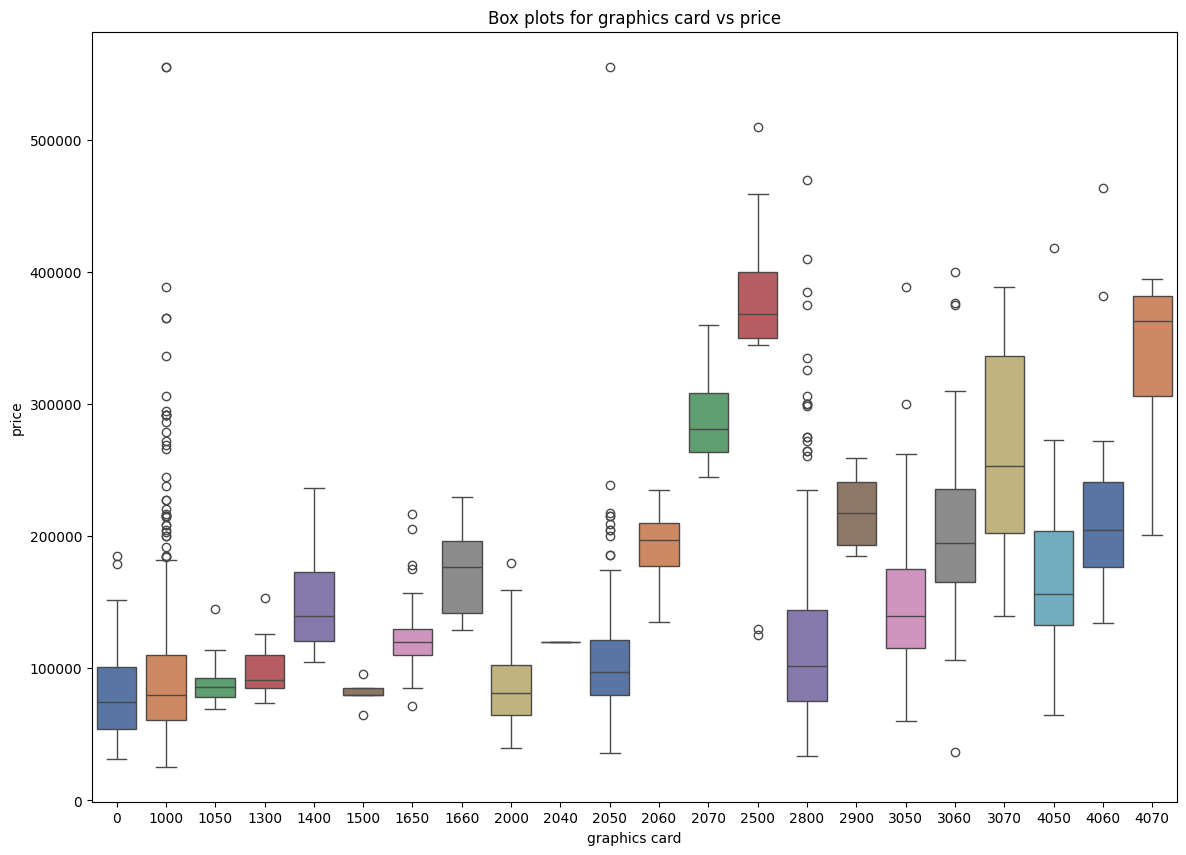

In [15]:
for col in cols_to_plot:
    plt.figure(figsize=(14,10))
    sns.boxplot(data=laptop, x=col , y='price', hue=col, palette='deep')
    plt.legend([], [], frameon=False)
    plt.title(f'Box plots for {col} vs price')
    plt.show()

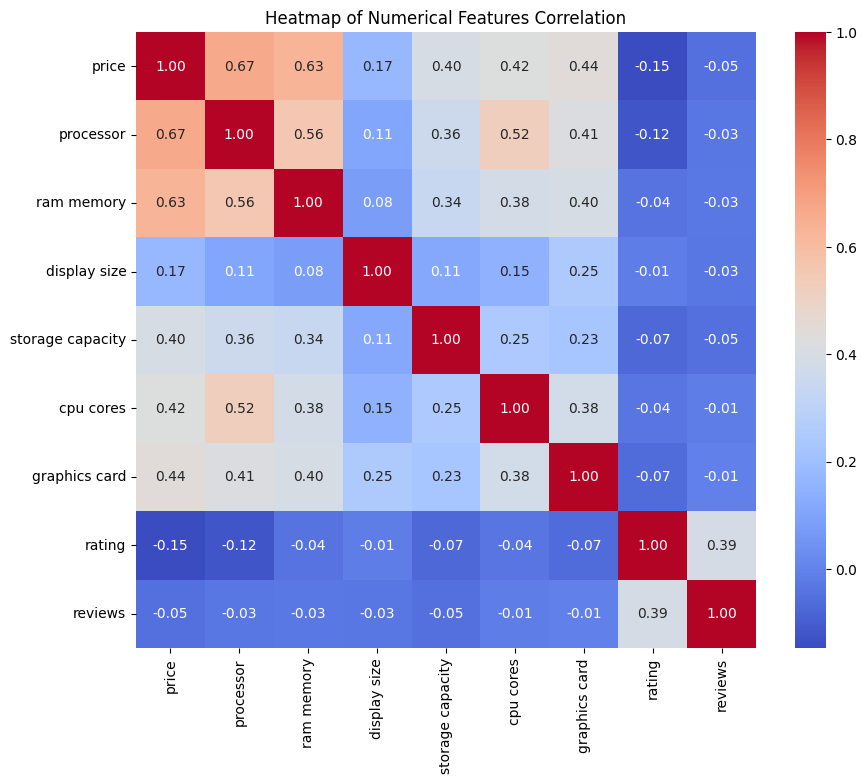

In [16]:
numerical_data = laptop[numeric_cols]
corr_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

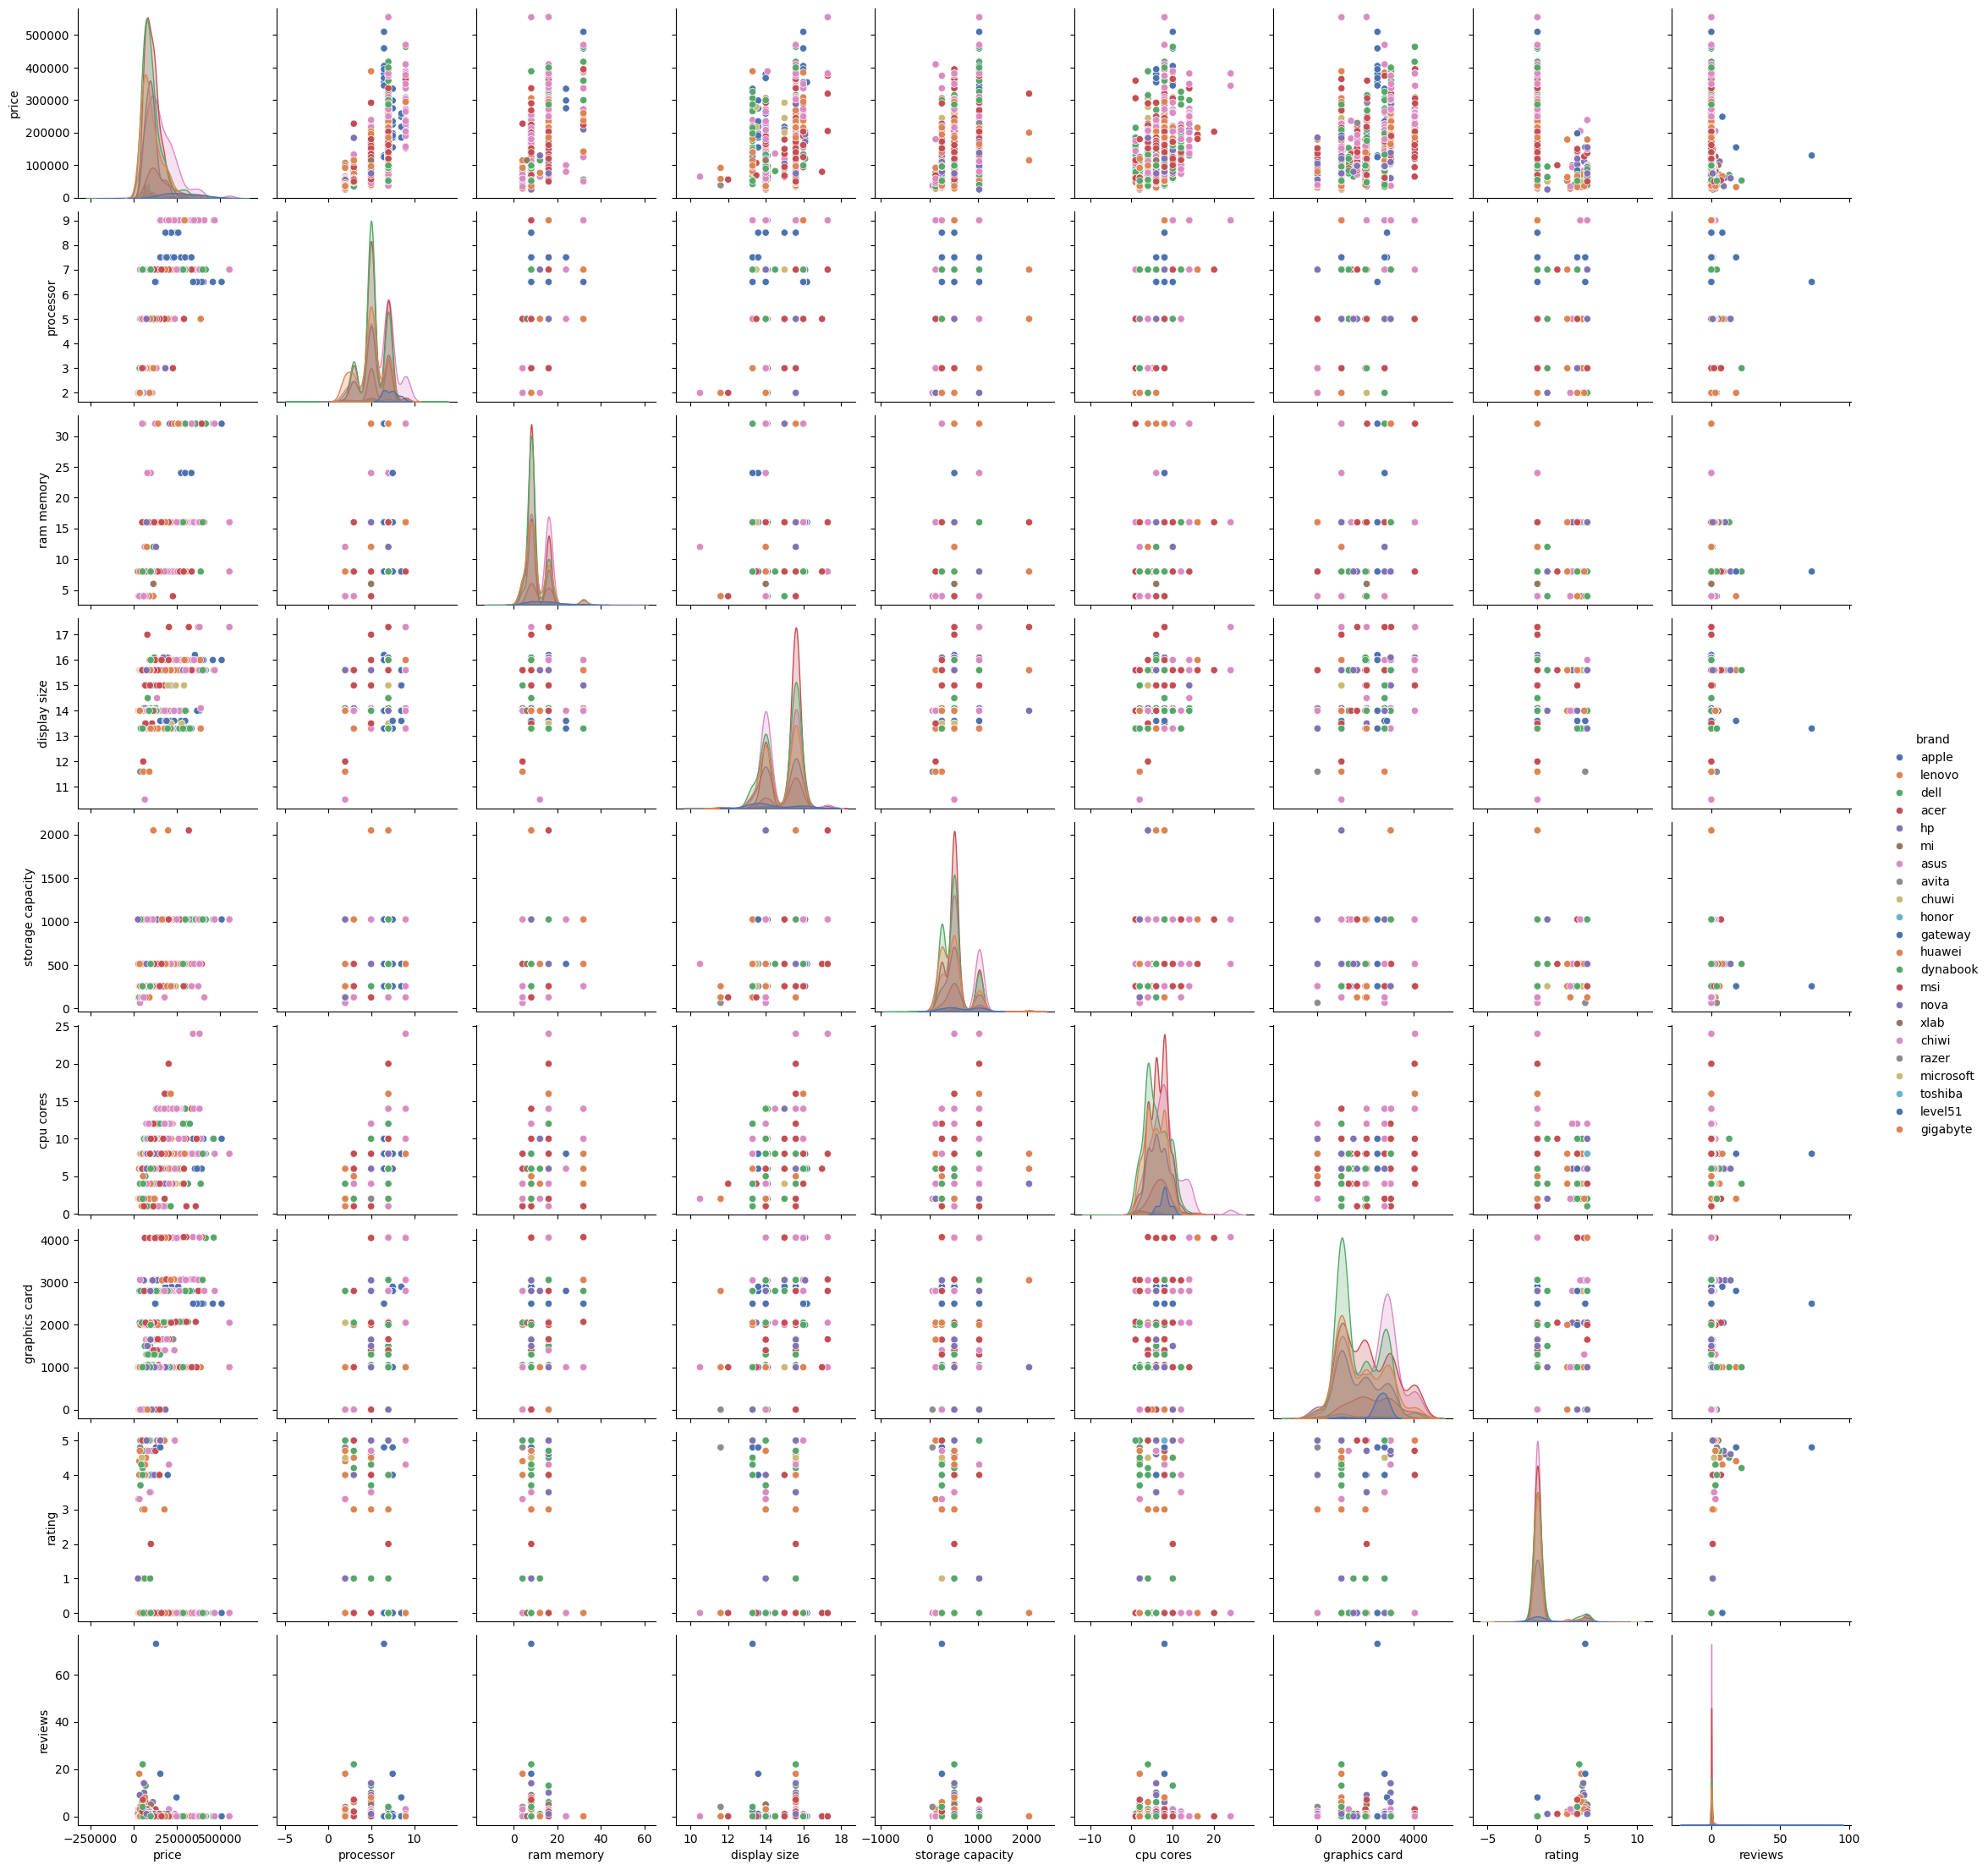

In [17]:
pairplot_data = laptop[pair_cols]
sns.pairplot(pairplot_data, hue='brand', palette='deep')
plt.show()